## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [1]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


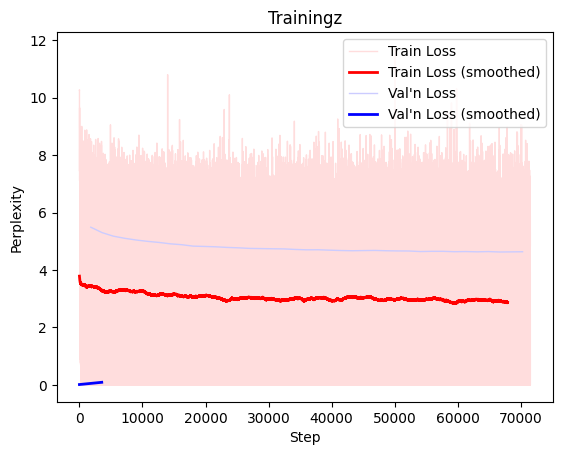

In [30]:
tdat = pd.read_csv('lightning_logs/version_0/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]
if True:
    import matplotlib.pyplot as plt

    xspace = np.linspace(0, len(train), len(train))
    fsz = max(20, len(train)//20)
    # filter = np.ones(fsz)/fsz
    filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

    plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
    plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
    if True or 'val_loss' in tdat:
        val = tdat.val_loss[~np.isnan(tdat.val_loss)]
        plt.plot( val, label = 'Val\'n Loss', color='#ccf', linewidth=1)
        plt.plot( np.convolve(val, filter, mode='valid'), label = 'Val\'n Loss (smoothed)', color='b', linewidth=2)

    plt.xlabel('Step')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title('Trainingz')
    plt.show()


In [31]:
np.mean(tdat.train_loss[-1000:])


3.066038345544185

In [32]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

1801     5.489288
3603     5.299705
5406     5.176215
7208     5.102324
9010     5.043283
10813    4.996694
12615    4.959386
14417    4.910861
16220    4.880554
18022    4.830724
19824    4.819825
21627    4.807364
23429    4.785780
25231    4.772031
27034    4.751072
28836    4.745408
30638    4.738979
32441    4.734624
34243    4.715380
36045    4.702459
37848    4.704679
39650    4.690526
41453    4.677847
43255    4.670181
45057    4.676246
46860    4.681407
48662    4.669847
50464    4.663582
52267    4.661257
54069    4.642128
55871    4.649661
57674    4.649853
59476    4.636644
61278    4.642153
63081    4.632285
64883    4.641583
66685    4.626311
68488    4.630570
70290    4.635562
Name: val_loss, dtype: float64